In [73]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy

from mpl_toolkits.mplot3d import Axes3D
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [74]:

# uni = "vtx_type1_16f_4h_200n_9l_mu0_e1_0516" 

uni = "pid_mu0_e1_allMeV_nopadding_1_64_8_64_100" 
# uni = "pid_mu0_e1_500MeV_nopadding_1_64_8_64_100" 

uni = "pid_mu0_e1_50_300MeV_nopadding_1_32_8_64_100"

path = "/users/yewzzang/work/KNO_reconstruction/combined/result_pid/*"+uni +"*/*"+uni +".csv"

pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

In [75]:
df = pd.read_csv(pred_list[0])

In [76]:
pred = np.array(df['prediction']).reshape(-1,1)
label = np.array(df['label']).reshape(-1,1)
fname = np.array(df['fname']).reshape(-1,1)

In [77]:
def calculate_efficiency(pred_label_0, pred_label_1, thresholds):
    efficiencies = {}
    for threshold in thresholds:
        eff_key_check = f"ele_eff_mu_{int(threshold*1000)}_miss_id_check"
        eff_key = f"ele_eff_mu_{int(threshold*1000)}_miss_id"
        cut_value = np.sort(pred_label_0)[int(len(pred_label_0) * (threshold))]
        
        efficiencies[eff_key_check] = np.mean(pred_label_0 > cut_value)
        efficiencies[eff_key] = np.mean(pred_label_1 > cut_value)
        
        rej_key_check = f"mu_rej_ele_{int(threshold*1000)}_miss_id_check"
        rej_key = f"mu_rej_ele_{int(threshold*1000)}_miss_id"
        cut_value = np.sort(pred_label_1)[int(len(pred_label_1) * (1 - threshold))]
        
        efficiencies[rej_key_check] = np.mean(pred_label_1 > cut_value)
        efficiencies[rej_key] = np.mean(pred_label_0 > cut_value)
        
    return efficiencies

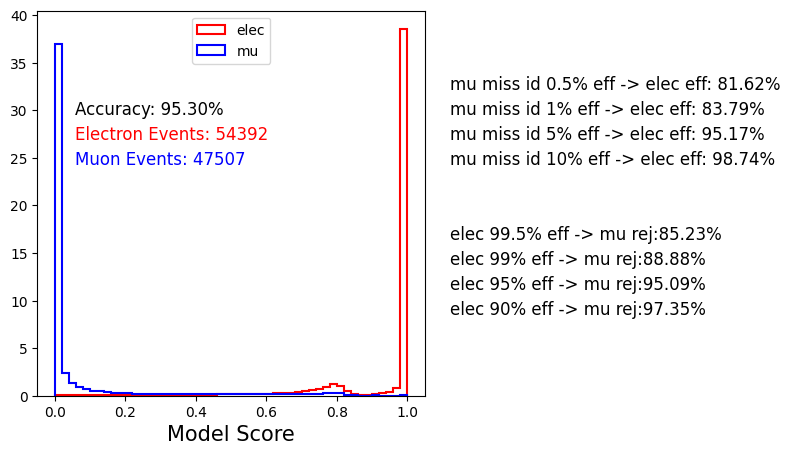

In [78]:
label0 = "pi0"
label0 = "mu"

plt.rcParams['figure.figsize'] = (5, 5)
plt.hist(pred[label==1],bins=50,density=True,histtype='step',color='red',linewidth=1.5,label='elec')
plt.hist(pred[label==0],bins=50,density=True,histtype='step',color='blue',linewidth=1.5,label=label0)
plt.legend(loc='upper center')


acc = (((pred[(label==1)]>0.5).sum()+(pred[(label==0)]<0.5).sum())/pred.shape[0])*100
elec_events = pred[(label==1)].shape[0]
mu_events = pred[(label==0)].shape[0]


pred_label_0 = pred[label == 0]
pred_label_1 = pred[label == 1]



thresholds = [0.995, 0.99, 0.95, 0.90]
efficiencies = calculate_efficiency(pred_label_0, pred_label_1, thresholds)

# for key, value in efficiencies.items():
#     print(f"{key}: {value}")

plt.figtext(0.2, 0.70, f'Accuracy: {acc:.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.2, 0.65, f'Electron Events: {elec_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='red')
plt.figtext(0.2, 0.60, f'Muon Events: {mu_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='blue')


plt.figtext(0.95, 0.75, str(label0)+' miss id 0.5% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_995_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.70, str(label0)+' miss id 1% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_990_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.65, str(label0)+' miss id 5% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_950_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.60, str(label0)+' miss id 10% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_900_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')



plt.figtext(0.95, 0.45, 'elec 99.5% eff -> '+str(label0)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_995_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.40, 'elec 99% eff -> '+str(label0)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_990_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.35, 'elec 95% eff -> '+str(label0)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_950_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
plt.figtext(0.95, 0.30, 'elec 90% eff -> '+str(label0)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_900_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')




plt.xlabel('Model Score',fontsize=15)

plt.show()

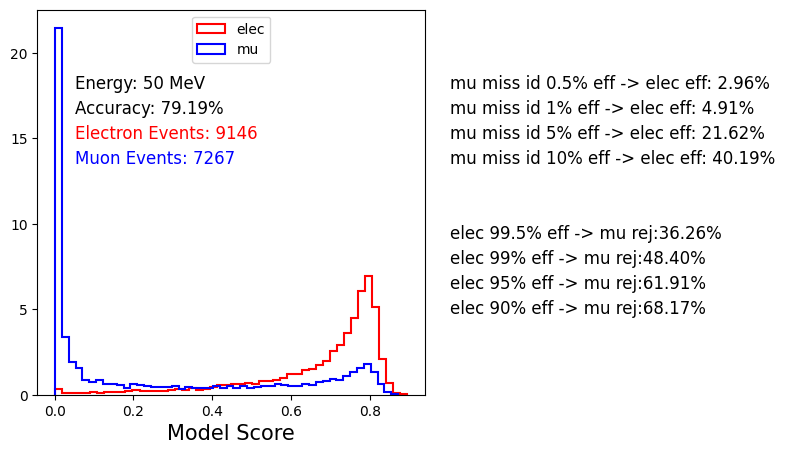

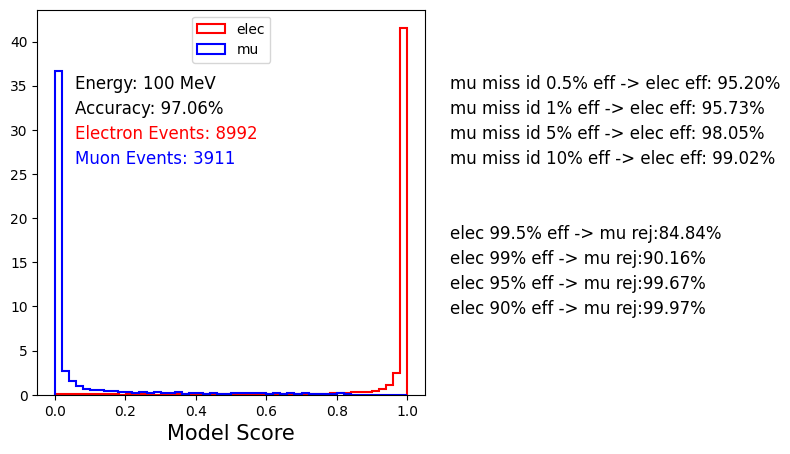

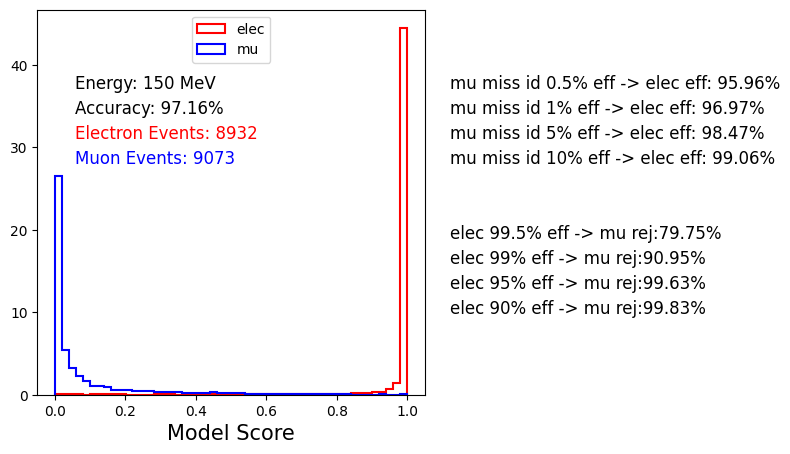

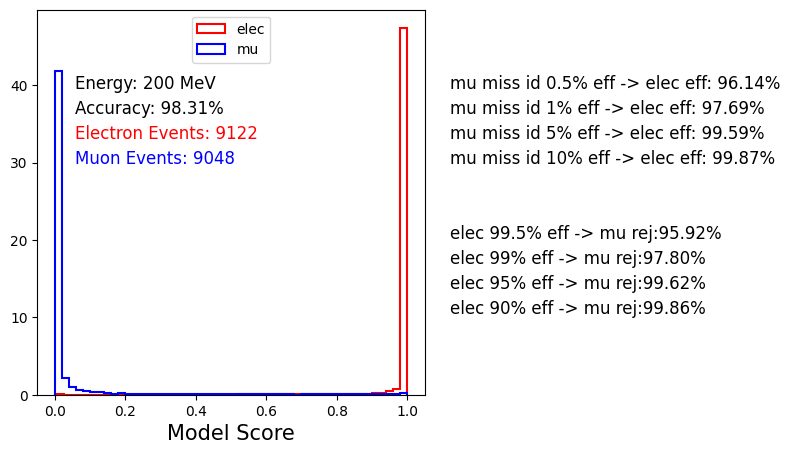

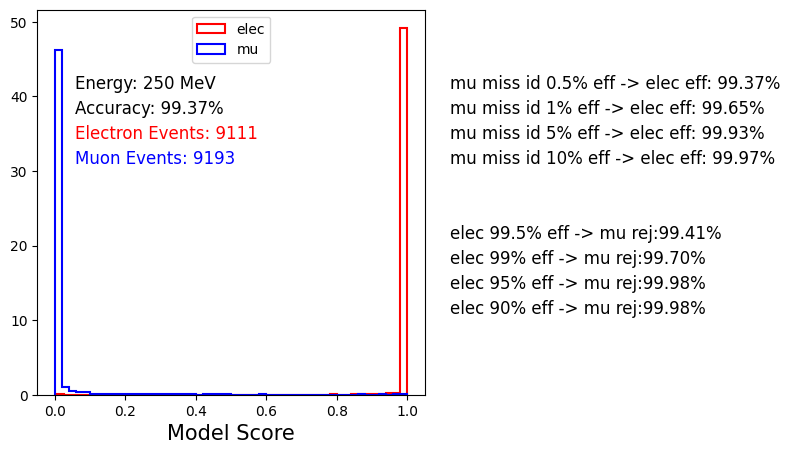

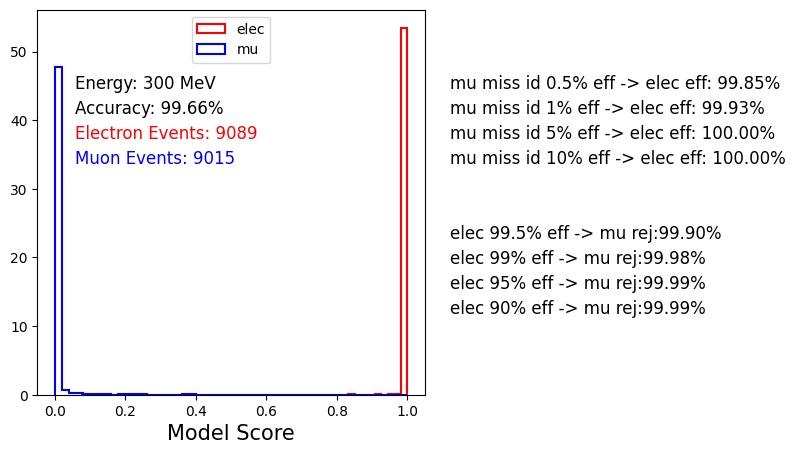

In [79]:
energy_s = []
acc_s = []
mu_missid_05 = []
elec_995 = []
label0 = "pi0"
label0 = "mu"
for energy in range(50,1050,50):
    if ((pred[(label==1)&(fname==energy)].shape[0]>0) & (pred[(label==0)&(fname==energy)].shape[0]>0)):
        
        plt.rcParams['figure.figsize'] = (5, 5)
        plt.hist(pred[(label==1)&(fname==energy)],bins=50,density=True,histtype='step',color='red',linewidth=1.5,label='elec')
        plt.hist(pred[(label==0)&(fname==energy)],bins=50,density=True,histtype='step',color='blue',linewidth=1.5,label=label0)
        plt.legend(loc='upper center')
        acc = (((pred[(label==1)&(fname==energy)]>0.5).sum()+(pred[(label==0)&(fname==energy)]<0.5).sum())/pred[fname==energy].shape[0])*100
        elec_events = pred[(label==1)&(fname==energy)].shape[0]
        mu_events = pred[(label==0)&(fname==energy)].shape[0]

        pred_label_0 = pred[(label==0)&(fname==energy)]
        pred_label_1 = pred[(label==1)&(fname==energy)]



        thresholds = [0.995, 0.99, 0.95, 0.90]
        efficiencies = calculate_efficiency(pred_label_0, pred_label_1, thresholds)

        # for key, value in efficiencies.items():
        #     print(f"{key}: {value}")
        
        plt.figtext(0.2, 0.75, f'Energy: {energy} MeV', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.2, 0.70, f'Accuracy: {acc:.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.2, 0.65, f'Electron Events: {elec_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='red')
        plt.figtext(0.2, 0.60, f'Muon Events: {mu_events}', horizontalalignment='left', verticalalignment='top', fontsize=12, color='blue')



        plt.figtext(0.95, 0.75, str(label0)+' miss id 0.5% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_995_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.95, 0.70, str(label0)+' miss id 1% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_990_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.95, 0.65, str(label0)+' miss id 5% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_950_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.95, 0.60, str(label0)+' miss id 10% eff -> elec eff: '+f'{(100*(efficiencies["ele_eff_mu_900_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')



        plt.figtext(0.95, 0.45, 'elec 99.5% eff -> '+str(label0)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_995_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.95, 0.40, 'elec 99% eff -> '+str(label0)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_990_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.95, 0.35, 'elec 95% eff -> '+str(label0)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_950_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
        plt.figtext(0.95, 0.30, 'elec 90% eff -> '+str(label0)+' rej:'+ f'{(100*(1-efficiencies["mu_rej_ele_900_miss_id"])):.2f}%', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')


        plt.xlabel('Model Score',fontsize=15)

        energy_s.append(energy)
        acc_s.append(acc)
        mu_missid_05.append(100*(efficiencies["ele_eff_mu_995_miss_id"]))
        elec_995.append(100*(1-efficiencies["mu_rej_ele_995_miss_id"]))

        # plt.ylabel('Num Events',fontsize=15)
        plt.show()

Text(0, 0.5, 'ACC (%)')

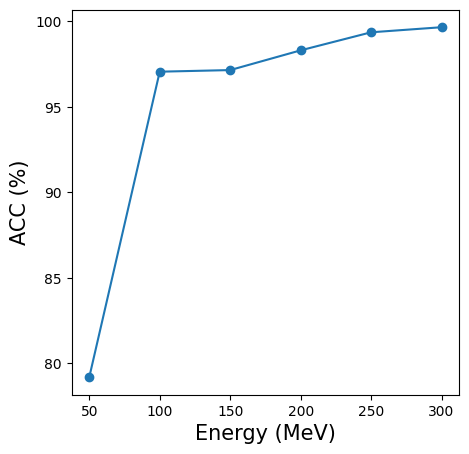

In [80]:
plt.plot(np.array(energy_s), np.array(acc_s),'o-')
plt.xlabel("Energy (MeV)",fontsize=15)
plt.ylabel("ACC (%)",fontsize=15)

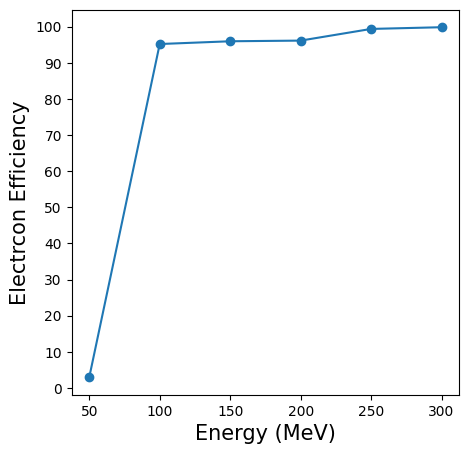

In [81]:
plt.plot(np.array(energy_s), np.array(mu_missid_05),'o-')
plt.xlabel("Energy (MeV)",fontsize=15)
plt.ylabel("Electrcon Efficiency",fontsize=15)
yticks = np.arange(0, 110, 10)
plt.yticks(yticks)
plt.show()

In [82]:
for i in range(len(acc_s)):
    print(energy_s[i],'|',acc_s[i],'|',mu_missid_05[i],'|',elec_995[i])

50 | 79.19332236641687 | 2.963043953640936 | 36.25980459611945
100 | 97.06269859722545 | 95.19572953736655 | 84.83763743288162
150 | 97.15634545959456 | 95.95835199283475 | 79.7531136338587
200 | 98.31040176114473 | 96.14119710589783 | 95.92175066312998
250 | 99.36625874125873 | 99.37438261442213 | 99.4125965408463
300 | 99.6630578877596 | 99.84596765320717 | 99.90016638935109


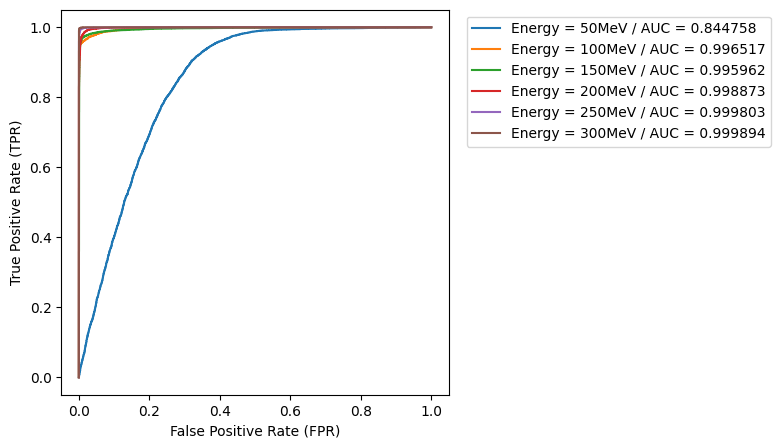

In [83]:
for energy in range(50,1050,50):
    if ((pred[(label==1)&(fname==energy)].shape[0]>0) & (pred[(label==0)&(fname==energy)].shape[0]>0)):
        fpr, tpr, thresholds = roc_curve(label[fname==energy], pred[fname==energy])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='Energy = '+str(energy)+'MeV / AUC = '+ f"{auc_score:.6f}")
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.legend(loc='best', bbox_to_anchor=(1.85,1.))
        # plt.show()

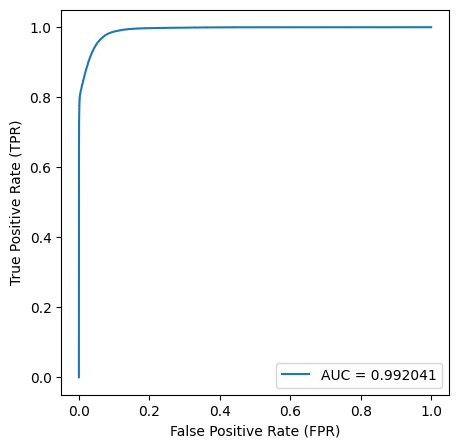

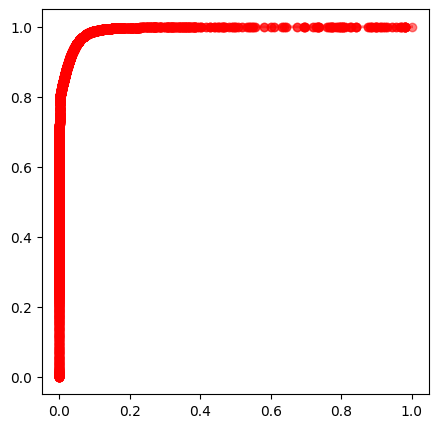

In [84]:


fpr, tpr, thresholds = roc_curve(label, pred)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = '+ f"{auc_score:.6f}")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()


# print('AUC:', auc_score)

plt.plot(fpr, tpr, color='r', linewidth=2, marker='o', alpha=0.5)